# The Sparks Foundation:

Data Science & Business Analytics Intern - June'21


Author: Aryan Tiwari


Task-1 : Prediction using Supervised ML


Predict the percentage of a student based on the no. of study hours.This is a simple linear regression task as it involves just two variables. Also, predict the percentage of the student if he/she studies for 9.25 hours/day.

Linear Regression with Python Scikit Learn
In this task we will see how the Python Scikit-Learn(sklearn) library for machine learning can be used to implement regressions. We will start with simple linear regression involving two variables.


# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [5]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Dataset imported successfully")

Dataset imported successfully


In [7]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
# Reading last five students hours and scores from dataset
data.tail()


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [11]:
data.shape   # 25 rows and 2 columns in our dataset

(25, 2)

In [13]:
# Statistical description of dataset
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
data.info()   #info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [16]:
data.value_counts()

Hours  Scores
1.1    17        1
5.1    47        1
8.9    95        1
8.5    75        1
8.3    81        1
7.8    86        1
7.7    85        1
7.4    69        1
6.9    76        1
6.1    67        1
5.9    62        1
5.5    60        1
4.8    54        1
1.5    20        1
4.5    41        1
3.8    35        1
3.5    30        1
3.3    42        1
3.2    27        1
2.7    30        1
       25        1
2.5    30        1
       21        1
1.9    24        1
9.2    88        1
dtype: int64

# VISUALIZING THE DATASET

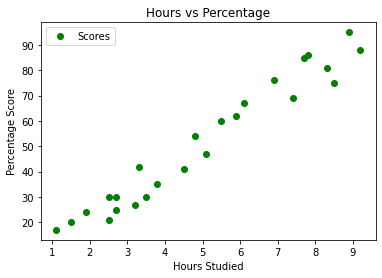

In [25]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o',color='g')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [18]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

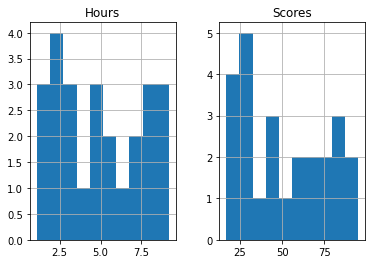

In [19]:
data.hist()

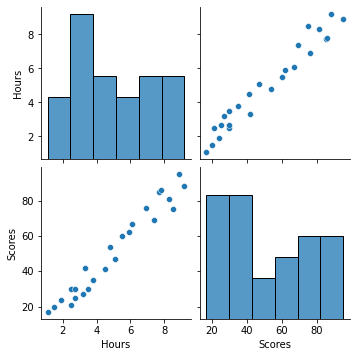

In [24]:
sns.pairplot(data, diag_kind="hist")

Preparing the data


The attributes are stored in the x variable. We specified "-1" as the range for columns since we wanted our attribute set to contain all the columns except the last one, which is "Scores". Similarly the y variable contains the labels. We specified 1 for the label column since the index for "Scores" column is 1. Remember, the column indexes start with 0, with 1 being the second column. In the next section, we will see a better way to specify columns for attributes and labels.

In [26]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
print(len(x_train))

20


In [30]:
print(len(x_test))

5


In [32]:
print(len(y_test))

5


In [33]:
print(len(y_train))

20


# Training the Model

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [34]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Training complete")


Training complete


# Visualizing the Model

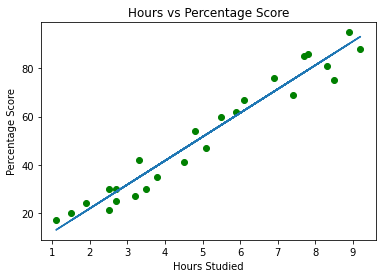

In [39]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y,color='g')
plt.plot(x, line);
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


In [41]:
print("Training Score: ",regressor.score(x_train,y_train)*100)


Training Score:  95.15510725211553


# Making Suitable Predictions

In [42]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [43]:
y_pred = regressor.predict(x_test)
print (y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


Comparing Actual Data and Predicated Data

In [44]:
# Comparing actual and predicted values of test dataset
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [45]:
hours = 9.25
prediction = regressor.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))


No of study Hours = 9.25
Predicted Score = 93.69173248737535


# Evaluating the Model


For Evaluation of the Regression Model Sklearn module provide many metrics,We are going to use these metrics to evaluate our model.

Mean absolute error : It measures the average magnitude of the errors in a set of predictions, without considering their direction.

Mean squared error : It measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

Root mean squared error : RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

In [46]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
